<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo70/blob/main/RetoFinal/Entrega1/Reto_Entrega1_Limpieza_an%C3%A1lisis_visualizaci%C3%B3n_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

**Maestría en Inteligencia Artificial Aplicada**

# Reto -> Entrega 1 (16/11): Limpieza, análisis, visualización y kmeans. 



---



---

## Datos generales



---



> Reto -> Entrega 1 (16/11): Limpieza, análisis, visualización y kmeans.


---



* Nombres del equipo 70:
  * Javier Pérez Sanagustín
  * Herbert Joadan Romero Villarreal

* Matrículas:
  * A01794233
  * A01794199


* Materia: Ciencia y analítica de datos (Gpo 10)

* Profesor titular: María de la Paz Rico Fernández

Profesor tutor: Bernardo Charles Canales

Fecha: 11 de noviembre del 2022






In [1]:
# Instalamos las librerías de python
# El comando capture evitará que se imprima todo el proceso de instalación
%%capture
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

# **Limpieza, análisis, visualización y agrupamiento.**

Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

Nosotros nos hemos decidido por la base de datos de aguas subterraneas.

## Aguas subterraneas

In [2]:
# Importamos la librería Pandas y el dataframe desde nuestro CSV
import pandas as pd
import matplotlib.pyplot as plt

url_sub = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo70/main/RetoFinal/DB/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df_sub = pd.read_csv(url_sub,encoding='cp1252')
df_sub.sample(3) # Observamos una muestra aleatoria de nuestros datos

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
1049,OCPYU6430,UAYMA,PENINSULA DE YUCATAN,YUCATAN,UAYMA,PENINSULA DE YUCATAN,POZO,-88.316667,20.716944,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
576,DLZAC2645,EL SALVADOR 1 (TANQUE NUEVO SAL003),CUENCAS CENTRALES DEL NORTE,ZACATECAS,EL SALVADOR,EL SALVADOR,POZO,-100.967380,24.384320,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1007,OCPYU6388,POZO 1 TAHDZIU,PENINSULA DE YUCATAN,YUCATAN,TAHDZIU,PENINSULA DE YUCATAN,POZO,-88.943750,20.203220,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


### Explorar datos 
Exploración de datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

* Identificando tendencias centrales promedio, moda y mediana de los datos. 
* Identificar medidas de dispersión, máximo, mínimo .
* Identificar medidas de posición no centrales , los cuartiles , outliers.   
* Identificar correlaciones.
* Preparar los datos


In [3]:
# Obtenemos la descripción del DataFrame
df_sub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [4]:
# Obtenemos unicamente la media de las variables numéricas
df_sub.mean(numeric_only=True)

LONGITUD         -101.891007
LATITUD            23.163618
PERIODO          2020.000000
ALC_mg/L          235.633759
CONDUCT_mS/cm    1138.953013
SDT_mg/L                 NaN
dtype: float64

In [5]:
# Obtenemos unicamente la moda de las variables numéricas
df_sub.mode(numeric_only=True, axis="index").iloc[0]

LONGITUD         -102.174880
LATITUD            19.234778
PERIODO          2020.000000
ALC_mg/L          157.620000
CONDUCT_mS/cm     777.000000
SDT_mg/L                 NaN
Name: 0, dtype: float64

In [6]:
# Obtenemos unicamente la mediana de las variables numéricas
df_sub.median(numeric_only=True, axis = 0)

LONGITUD         -102.17418
LATITUD            22.61719
PERIODO          2020.00000
ALC_mg/L          215.52750
CONDUCT_mS/cm     815.00000
SDT_mg/L                NaN
dtype: float64

In [7]:
# Obtenemos los Deciles, Percentiles y Cuantiles de las variables numéricas
df_sub.quantile([.10, .25, .50, .75, .90])

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
0.10,-110.650227,18.966991,2020.0,116.5100,333.10,NaN
0.25,-105.388865,20.212055,2020.0,164.0000,501.75,NaN
0.50,-102.174180,22.617190,2020.0,215.5275,815.00,NaN
0.75,-98.974716,25.510285,2020.0,292.7100,1322.75,NaN
0.90,-90.123083,29.177420,2020.0,357.4200,2171.40,NaN


Una vez analizadas las estadísticas de las variables numéricas, procedemos a detectar outliers. Para ello, necesitamos graficar y análizar nuestros posibles valores atípicos.

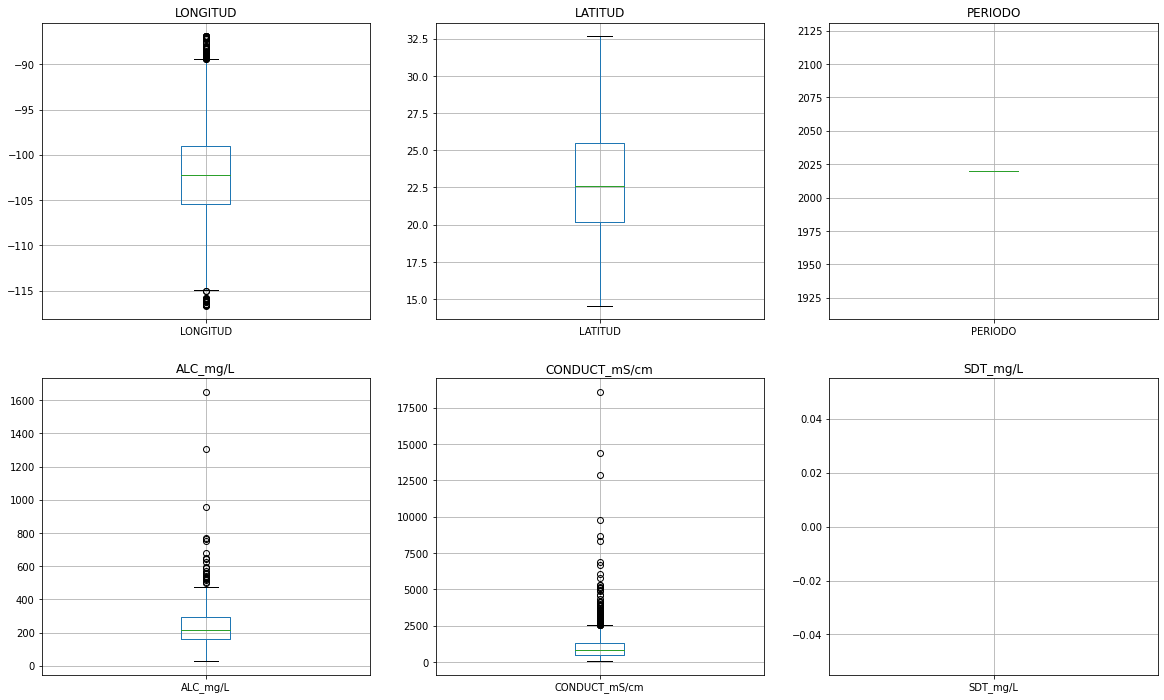

In [8]:
# Variables numéricas antes de limpieza
temp_numericas = ["LONGITUD", "LATITUD", "PERIODO", "ALC_mg/L", "CONDUCT_mS/cm","SDT_mg/L"]
df_temp_numericas = df_sub[["LONGITUD", "LATITUD", "PERIODO", "ALC_mg/L", "CONDUCT_mS/cm","SDT_mg/L"]]

# Graficamos cada boxplot por separado para visualizar mejor los datos
n = 2
m = 3
fig, axs = plt.subplots(n, m, figsize=(20, 12))
columns_list = list(df_temp_numericas.columns)

for i in range(n):
  for j in range(m):
    if(i*(n+1) + j < 6):
      df_temp_numericas.boxplot(column=columns_list[i*(n+1) + j], ax=axs[i, j])
      axs[i, j].set_title(columns_list[i*(n+1) + j])

plt.plot()
plt.show()

In [9]:
df_sub.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [10]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Después de explorar los datos nos percatamos que varias columnas incluyen símbolos que no serán válidos a la hora de usar un modelo. Es decir, algunos son nulos, NaN o incluyen un símbolo de menor "<".

Para ello, realizaremos una limpieza de columnas y de los registros en cada columna.

---

Para tener mejor control del data frame, se de decide dividir en tres partes, con base al valor de la columna de 'SEMAFORO'. Con éllo, agrupar los valores de las filas en trés diferentes data frame.

In [11]:
df_sb_v = pd.DataFrame(df_sub[df_sub['SEMAFORO'] == 'Verde'])
df_sb_r = pd.DataFrame(df_sub[df_sub['SEMAFORO'] == 'Rojo'])
df_sb_a = pd.DataFrame(df_sub[df_sub['SEMAFORO'] == 'Amarillo'])

In [12]:
df_sb_v.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [13]:
df_sb_r.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.244800,23.451380,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
5,DLBAJ108,POZO A.P. CNA 7 (ANTES POZO A.P. CNA 6),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.220670,23.464930,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI
7,DLBAJ111,VICTOR HUGO CESEÑA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,CABO SAN LUCAS,POZO,-109.907306,22.890500,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
9,DLBAJ118,SAN ANTONIO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LOS PLANES,POZO,-110.054722,23.824722,2020,...,NO,NO,SI,NO,SI,SI,SI,SI,NO,NO


In [14]:
df_sb_a.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
17,DLBAJ131,"L. 20, EJ. STO. DOMINGO",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,SANTO DOMINGO,POZO,-111.922210,25.50470,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
21,DLBAJ150,POZO 2A,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LORETO,SAN JUAN B. LONDO,POZO,-111.548940,26.30176,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
24,DLBAJ161,CNA-SI-03 (EJ. ALFREDO V. BONFIL),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,MULEGE,SAN IGNACIO,POZO,-112.762754,27.33590,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,NO
37,DLBAJ70,POZO NO. XII (ANTES A.P. XII),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LA PAZ,POZO,-110.307730,24.08008,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,NO
38,DLBAJ71,A.P. NO. X,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LA PAZ,POZO,-110.315380,24.05496,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


La función cleanValues() se encarga de eliminar signos de los datos, cambiar de formato y rellenar los valores Nan con  el promedio, de cada uno de los tres df.  

* Se eliminan los símbolos de '<'.
* Se cambia de formato de las columnas a flotante. 
* Los valores nullos/NaN, se rellenan con la media.

El arreglo NQ son las columnas en donde se desea que se haga esa limpieza. 

In [15]:
import numpy as np

mg = list()
mr = list()
my = list()
names = list()

def cleanValues(df_s, array_columns, list_s):

  for i in array_columns:
  
    df_s[i] = df_s[i].astype('str')
    df_s[i] = df_s[i].str.replace('<25','25',regex=True) 
    df_s[i] = df_s[i].str.replace('<0.2','0.2',regex=True) 
    df_s[i] = df_s[i].str.replace('<20','20',regex=True) 
    df_s[i] = df_s[i].str.replace('<1.1','1.1',regex=True)
    df_s[i] = df_s[i].str.replace('<0.02','0.02',regex=True) 
    df_s[i] = df_s[i].str.replace('<0.01','0.01',regex=True) 
    df_s[i] = df_s[i].str.replace('<0.003','0.003',regex=True)
    df_s[i] = df_s[i].str.replace('<0.005','0.004',regex=True) 
    df_s[i] = df_s[i].str.replace('<0.0005','0.0004',regex=True) 
    df_s[i] = df_s[i].str.replace('<0.0015','0.0015',regex=True) 
    df_s[i] = df_s[i].str.replace('<0.025','0.025',regex=True) 
    df_s[i]= df_s[i].astype('float')
    mean_a = df_s[i].mean()
    df_s[i] = df_s[i].replace(np.nan,mean_a)
    list_s.append(mean_a)
    names.append(i)

NQ = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

cleanValues(df_sb_v, NQ, mg)
cleanValues(df_sb_r, NQ, mr)
cleanValues(df_sb_a, NQ, my)

In [16]:
print(df_sb_v)
print(df_sb_r)
print(df_sb_a)

            CLAVE                                              SITIO  \
0          DLAGU6                                       POZO SAN GIL   
1       DLAGU6516                             POZO R013 CAÑADA HONDA   
3          DLAGU9                                 POZO EL SALITRILLO   
6        DLBAJ110                                  POZO 26, SAN JUAN   
8        DLBAJ117                                       LAS PARRITAS   
...           ...                                                ...   
1056  OCRBR5007M2  EJIDO SANTA ISABEL Y DOLORES (TOMA DOMICILIARI...   
1057  OCRBR5008M1                        POZO SAN JERONIMO II (SADM)   
1059  OCRBR5046M2               EJIDO EL CALVARIO (POZO COMUNITARIO)   
1066  OCRBR5106M1                              COMUNIDAD LOS POCITOS   
1067  OCRBR5109M1                               COMUNIDAD LA REFORMA   

               ORGANISMO_DE_CUENCA               ESTADO          MUNICIPIO  \
0          LERMA SANTIAGO PACIFICO       AGUASCALIENTES  

Se realiza una asignación entre el promedio de las mediciones con la columna de valoración (para tener en cuenta la calidad del agua), por lo tanto, dependiendo de su valor, se le dará una valoración, para así rellenar las columnas del DF con una categorización. Se inicia con el DF de las variables con valor verde de la columna de 'SEMAFORO'. 

In [17]:
CQ = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR', 'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB', 'CALIDAD_MN','CALIDAD_FE']

n=0

sg =list()
sr = list()
sy = list()

for i in NQ: 
 sg.append([mg[n],names[n]])
 n=n+1

catg_g = ['Alta','Buena para riego','NaN','Potable - Dulce','Media','Potable - Dura','Buena calidad', 'Potable - Excelente','Potable - Excelente','Potable - Excelente','Potable - Excelente','Potable - Excelente', 'Potable - Excelente','Potable - Excelente','Potable - Excelente']

df_gDN = pd.DataFrame(sg)
df_gDN['V'] = catg_g
df_gDN['CQ'] = CQ

Se realiza la misma tarea para los df amarillos y rojos. 

In [18]:
n=0
for i in NQ: 
 sr.append([mr[n],names[n]])
 n=n+1

catg_r = ['Alta','Permisible para riego','NaN','Potable - Dulce','Alta','Potable - Dura','Aceptable', 'Potable - Buena calidad','Apta como FAAP','Apta como FAAP','Potable - Excelente','Potable - Excelente', 'Potable - Excelente','Potable - Excelente','Sin efectos en la salud - Puede dar color al agua']

df_rDN = pd.DataFrame (sr)
df_rDN['V'] = catg_r
df_rDN['CQ'] = CQ

In [19]:
n=0
for i in NQ: 
 sy.append([mr[n],names[n]])
 n=n+1

catg_y = ['Alta','Permisible para riego','NaN','Ligeramente salobres','Media','Muy dura e indeseable usos industrial y domestico','Buena calidad', 'Potable - Buena calidad','Apta como FAAP','Potable - Excelente','No apta como FAAP','Potable - Excelente', 'Potable - Excelente','Sin efectos en la salud - Puede dar color al agua','Sin efectos en la salud - Puede dar color al agua']


df_yDN = pd.DataFrame (sy)
df_yDN['V'] = catg_y
df_yDN['CQ'] = CQ

Se hace un mapeo entre la valoración con el data frame y su clasificación. Se rellenan los valores nulos/NaN, para tener un data frame limpio. Se realiza para los tres df (green, red, yellow).

In [20]:
i=0
for c in CQ:
   
    valor = df_gDN[df_gDN['CQ'] == c]
    valoracion= valor.loc[i]['V']
    df_sb_v[c]= df_sb_v[c].astype('str')
    df_sb_v[c]= df_sb_v[c].replace('nan', valoracion)
    i=i+1
    
df_sb_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 434 non-null    object 
 1   SITIO                 434 non-null    object 
 2   ORGANISMO_DE_CUENCA   434 non-null    object 
 3   ESTADO                434 non-null    object 
 4   MUNICIPIO             434 non-null    object 
 5   ACUIFERO              434 non-null    object 
 6   SUBTIPO               434 non-null    object 
 7   LONGITUD              434 non-null    float64
 8   LATITUD               434 non-null    float64
 9   PERIODO               434 non-null    int64  
 10  ALC_mg/L              434 non-null    float64
 11  CALIDAD_ALC           434 non-null    object 
 12  CONDUCT_mS/cm         434 non-null    float64
 13  CALIDAD_CONDUC        434 non-null    object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L            

In [21]:
i=0
for c in CQ:
   
    valor = df_rDN[df_rDN['CQ'] == c]
    valoracion= valor.loc[i]['V']
    df_sb_r[c]= df_sb_v[c].astype('str')
    df_sb_r[c]= df_sb_v[c].replace('nan', valoracion)
    i=i+1
    
df_sb_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 434 non-null    object 
 1   SITIO                 434 non-null    object 
 2   ORGANISMO_DE_CUENCA   434 non-null    object 
 3   ESTADO                434 non-null    object 
 4   MUNICIPIO             434 non-null    object 
 5   ACUIFERO              434 non-null    object 
 6   SUBTIPO               434 non-null    object 
 7   LONGITUD              434 non-null    float64
 8   LATITUD               434 non-null    float64
 9   PERIODO               434 non-null    int64  
 10  ALC_mg/L              434 non-null    float64
 11  CALIDAD_ALC           434 non-null    object 
 12  CONDUCT_mS/cm         434 non-null    float64
 13  CALIDAD_CONDUC        434 non-null    object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L            

In [22]:
i=0
for c in CQ:
   
    valor = df_yDN[df_yDN['CQ'] == c]
    valoracion= valor.loc[i]['V']
    df_sb_a[c]= df_sb_v[c].astype('str')
    df_sb_a[c]= df_sb_v[c].replace('nan', valoracion)
    i=i+1
    
df_sb_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 434 non-null    object 
 1   SITIO                 434 non-null    object 
 2   ORGANISMO_DE_CUENCA   434 non-null    object 
 3   ESTADO                434 non-null    object 
 4   MUNICIPIO             434 non-null    object 
 5   ACUIFERO              434 non-null    object 
 6   SUBTIPO               434 non-null    object 
 7   LONGITUD              434 non-null    float64
 8   LATITUD               434 non-null    float64
 9   PERIODO               434 non-null    int64  
 10  ALC_mg/L              434 non-null    float64
 11  CALIDAD_ALC           434 non-null    object 
 12  CONDUCT_mS/cm         434 non-null    float64
 13  CALIDAD_CONDUC        434 non-null    object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L            

Se corrigen los campos de valoración de la calidad del agua. Se rellenan con valores boolean para tener una categorización fija si cumple o no. Los valores son True o False. 

In [23]:
CC = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR', 'CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

def changeV(df_changeA):

  for col in CC:
    df_changeA[col]= df_changeA[col].astype('str')
    df_changeA[col]= df_changeA[col].replace('ND', 'True')

changeV(df_sb_v)
changeV(df_sb_r)
changeV(df_sb_a)

Se concatenan los tres data frame (green, red and yellow). Para proceder con más limpieza. 

In [24]:
df_sub_clean = pd.concat([df_sb_v, df_sb_r, df_sb_a],join='inner')
df_sub_clean

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,OCPYU6428,TIXKOKOB.,PENINSULA DE YUCATAN,YUCATAN,TIXKOKOB,PENINSULA DE YUCATAN,POZO,-89.393611,21.002222,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1048,OCPYU6429,TIXPHEUAL,PENINSULA DE YUCATAN,YUCATAN,TIXPEHUAL,PENINSULA DE YUCATAN,POZO,-89.441667,20.977778,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1050,OCPYU6431,POZO 2 PISTE,PENINSULA DE YUCATAN,YUCATAN,TINUM,PENINSULA DE YUCATAN,POZO,-88.589530,20.704360,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1051,OCPYU6432,XOCCHEL,PENINSULA DE YUCATAN,YUCATAN,XOCCHEL,PENINSULA DE YUCATAN,POZO,-89.182510,20.837920,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


Se hará la eliminación de columnas con información redundante, innecesaria para el análisis o que se puede deducir, para así hacer una redución de variables.  

La información de las columnas se obtiene del siguiente enlace. 

[indicadores de la calidad del agua superficial y subterránea](http://sina.conagua.gob.mx/sina/mapas/Calidaddelagua.pdf)

Y con éllo se empieza a clasificar, qué columnas son importantes para nuestro análisis.

Debido a que la columna SDT_mg/L no tiene valores, se elimina de la DB.  



In [25]:
df_sub_clean.drop('SDT_mg/L', inplace=True, axis=1)
df_sub_clean

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,OCPYU6428,TIXKOKOB.,PENINSULA DE YUCATAN,YUCATAN,TIXKOKOB,PENINSULA DE YUCATAN,POZO,-89.393611,21.002222,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1048,OCPYU6429,TIXPHEUAL,PENINSULA DE YUCATAN,YUCATAN,TIXPEHUAL,PENINSULA DE YUCATAN,POZO,-89.441667,20.977778,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1050,OCPYU6431,POZO 2 PISTE,PENINSULA DE YUCATAN,YUCATAN,TINUM,PENINSULA DE YUCATAN,POZO,-88.589530,20.704360,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1051,OCPYU6432,XOCCHEL,PENINSULA DE YUCATAN,YUCATAN,XOCCHEL,PENINSULA DE YUCATAN,POZO,-89.182510,20.837920,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


Existen dos columnas que nos dicen la cantidad de sólidos disueltos en el agua. La columna que nos interesa es la de la sanilización, debido a que determina si es potable o no, por lo tanto, se pueden eliminar esas columnas.

In [26]:
df_sub_clean.drop('CALIDAD_SDT_ra', inplace=True, axis=1)
df_sub_clean.drop('CUMPLE_CON_SDT_ra', inplace=True, axis=1)
df_sub_clean

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,OCPYU6428,TIXKOKOB.,PENINSULA DE YUCATAN,YUCATAN,TIXKOKOB,PENINSULA DE YUCATAN,POZO,-89.393611,21.002222,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1048,OCPYU6429,TIXPHEUAL,PENINSULA DE YUCATAN,YUCATAN,TIXPEHUAL,PENINSULA DE YUCATAN,POZO,-89.441667,20.977778,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1050,OCPYU6431,POZO 2 PISTE,PENINSULA DE YUCATAN,YUCATAN,TINUM,PENINSULA DE YUCATAN,POZO,-88.589530,20.704360,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1051,OCPYU6432,XOCCHEL,PENINSULA DE YUCATAN,YUCATAN,XOCCHEL,PENINSULA DE YUCATAN,POZO,-89.182510,20.837920,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


Otra columna que se puede eliminar es la de 'CONTAMINANTES', debido a que indica que contaminantes no pasaron el criterio si el agua es de buena calidad. Por lo cuál, para nuestro análisis, se puede eliminar. 

In [27]:
df_sub_clean.drop('CONTAMINANTES', inplace=True, axis=1)
df_sub_clean

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,OCPYU6428,TIXKOKOB.,PENINSULA DE YUCATAN,YUCATAN,TIXKOKOB,PENINSULA DE YUCATAN,POZO,-89.393611,21.002222,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1048,OCPYU6429,TIXPHEUAL,PENINSULA DE YUCATAN,YUCATAN,TIXPEHUAL,PENINSULA DE YUCATAN,POZO,-89.441667,20.977778,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1050,OCPYU6431,POZO 2 PISTE,PENINSULA DE YUCATAN,YUCATAN,TINUM,PENINSULA DE YUCATAN,POZO,-88.589530,20.704360,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1051,OCPYU6432,XOCCHEL,PENINSULA DE YUCATAN,YUCATAN,XOCCHEL,PENINSULA DE YUCATAN,POZO,-89.182510,20.837920,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


Se observa que la columna de 'PERIODO' tiene el mismo valor para todas las filas. Por lo cuál, también se puede omitir.

In [28]:
df_sub_clean.drop('PERIODO', inplace=True, axis=1)
df_sub_clean

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,203.670,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,343.655,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,OCPYU6428,TIXKOKOB.,PENINSULA DE YUCATAN,YUCATAN,TIXKOKOB,PENINSULA DE YUCATAN,POZO,-89.393611,21.002222,277.910,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1048,OCPYU6429,TIXPHEUAL,PENINSULA DE YUCATAN,YUCATAN,TIXPEHUAL,PENINSULA DE YUCATAN,POZO,-89.441667,20.977778,311.330,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1050,OCPYU6431,POZO 2 PISTE,PENINSULA DE YUCATAN,YUCATAN,TINUM,PENINSULA DE YUCATAN,POZO,-88.589530,20.704360,312.290,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1051,OCPYU6432,XOCCHEL,PENINSULA DE YUCATAN,YUCATAN,XOCCHEL,PENINSULA DE YUCATAN,POZO,-89.182510,20.837920,395.370,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [29]:
#El df limpio se almacena en una variable nueva. 
df_sub_clean2 = df_sub_clean.copy()
df_sub_clean2

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,203.670,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,343.655,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,OCPYU6428,TIXKOKOB.,PENINSULA DE YUCATAN,YUCATAN,TIXKOKOB,PENINSULA DE YUCATAN,POZO,-89.393611,21.002222,277.910,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1048,OCPYU6429,TIXPHEUAL,PENINSULA DE YUCATAN,YUCATAN,TIXPEHUAL,PENINSULA DE YUCATAN,POZO,-89.441667,20.977778,311.330,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1050,OCPYU6431,POZO 2 PISTE,PENINSULA DE YUCATAN,YUCATAN,TINUM,PENINSULA DE YUCATAN,POZO,-88.589530,20.704360,312.290,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1051,OCPYU6432,XOCCHEL,PENINSULA DE YUCATAN,YUCATAN,XOCCHEL,PENINSULA DE YUCATAN,POZO,-89.182510,20.837920,395.370,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


### Correlación de variables
Se realiza el mapa de correlación para ver las variables que son dependientes entre sí.

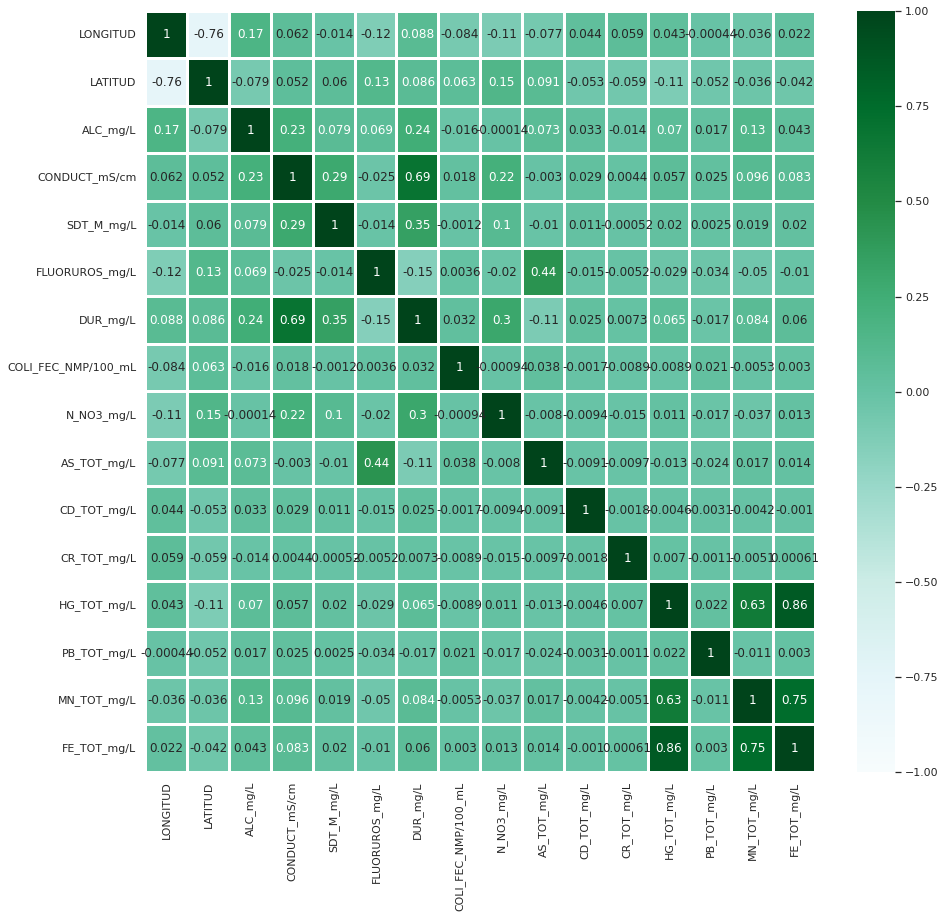

In [30]:
import seaborn as sns

df_sub_clean2.corr()
plot_df_sub_clean2 = df_sub_clean2.corr()
sns.set(rc = {'figure.figsize':(15,14)})
sns.heatmap(plot_df_sub_clean2, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths = 2)


Variables númericas, contemplando la eliminación de las columnas en la sección anterior. Se realiza la graficación de los datos del dataframe limpio. 

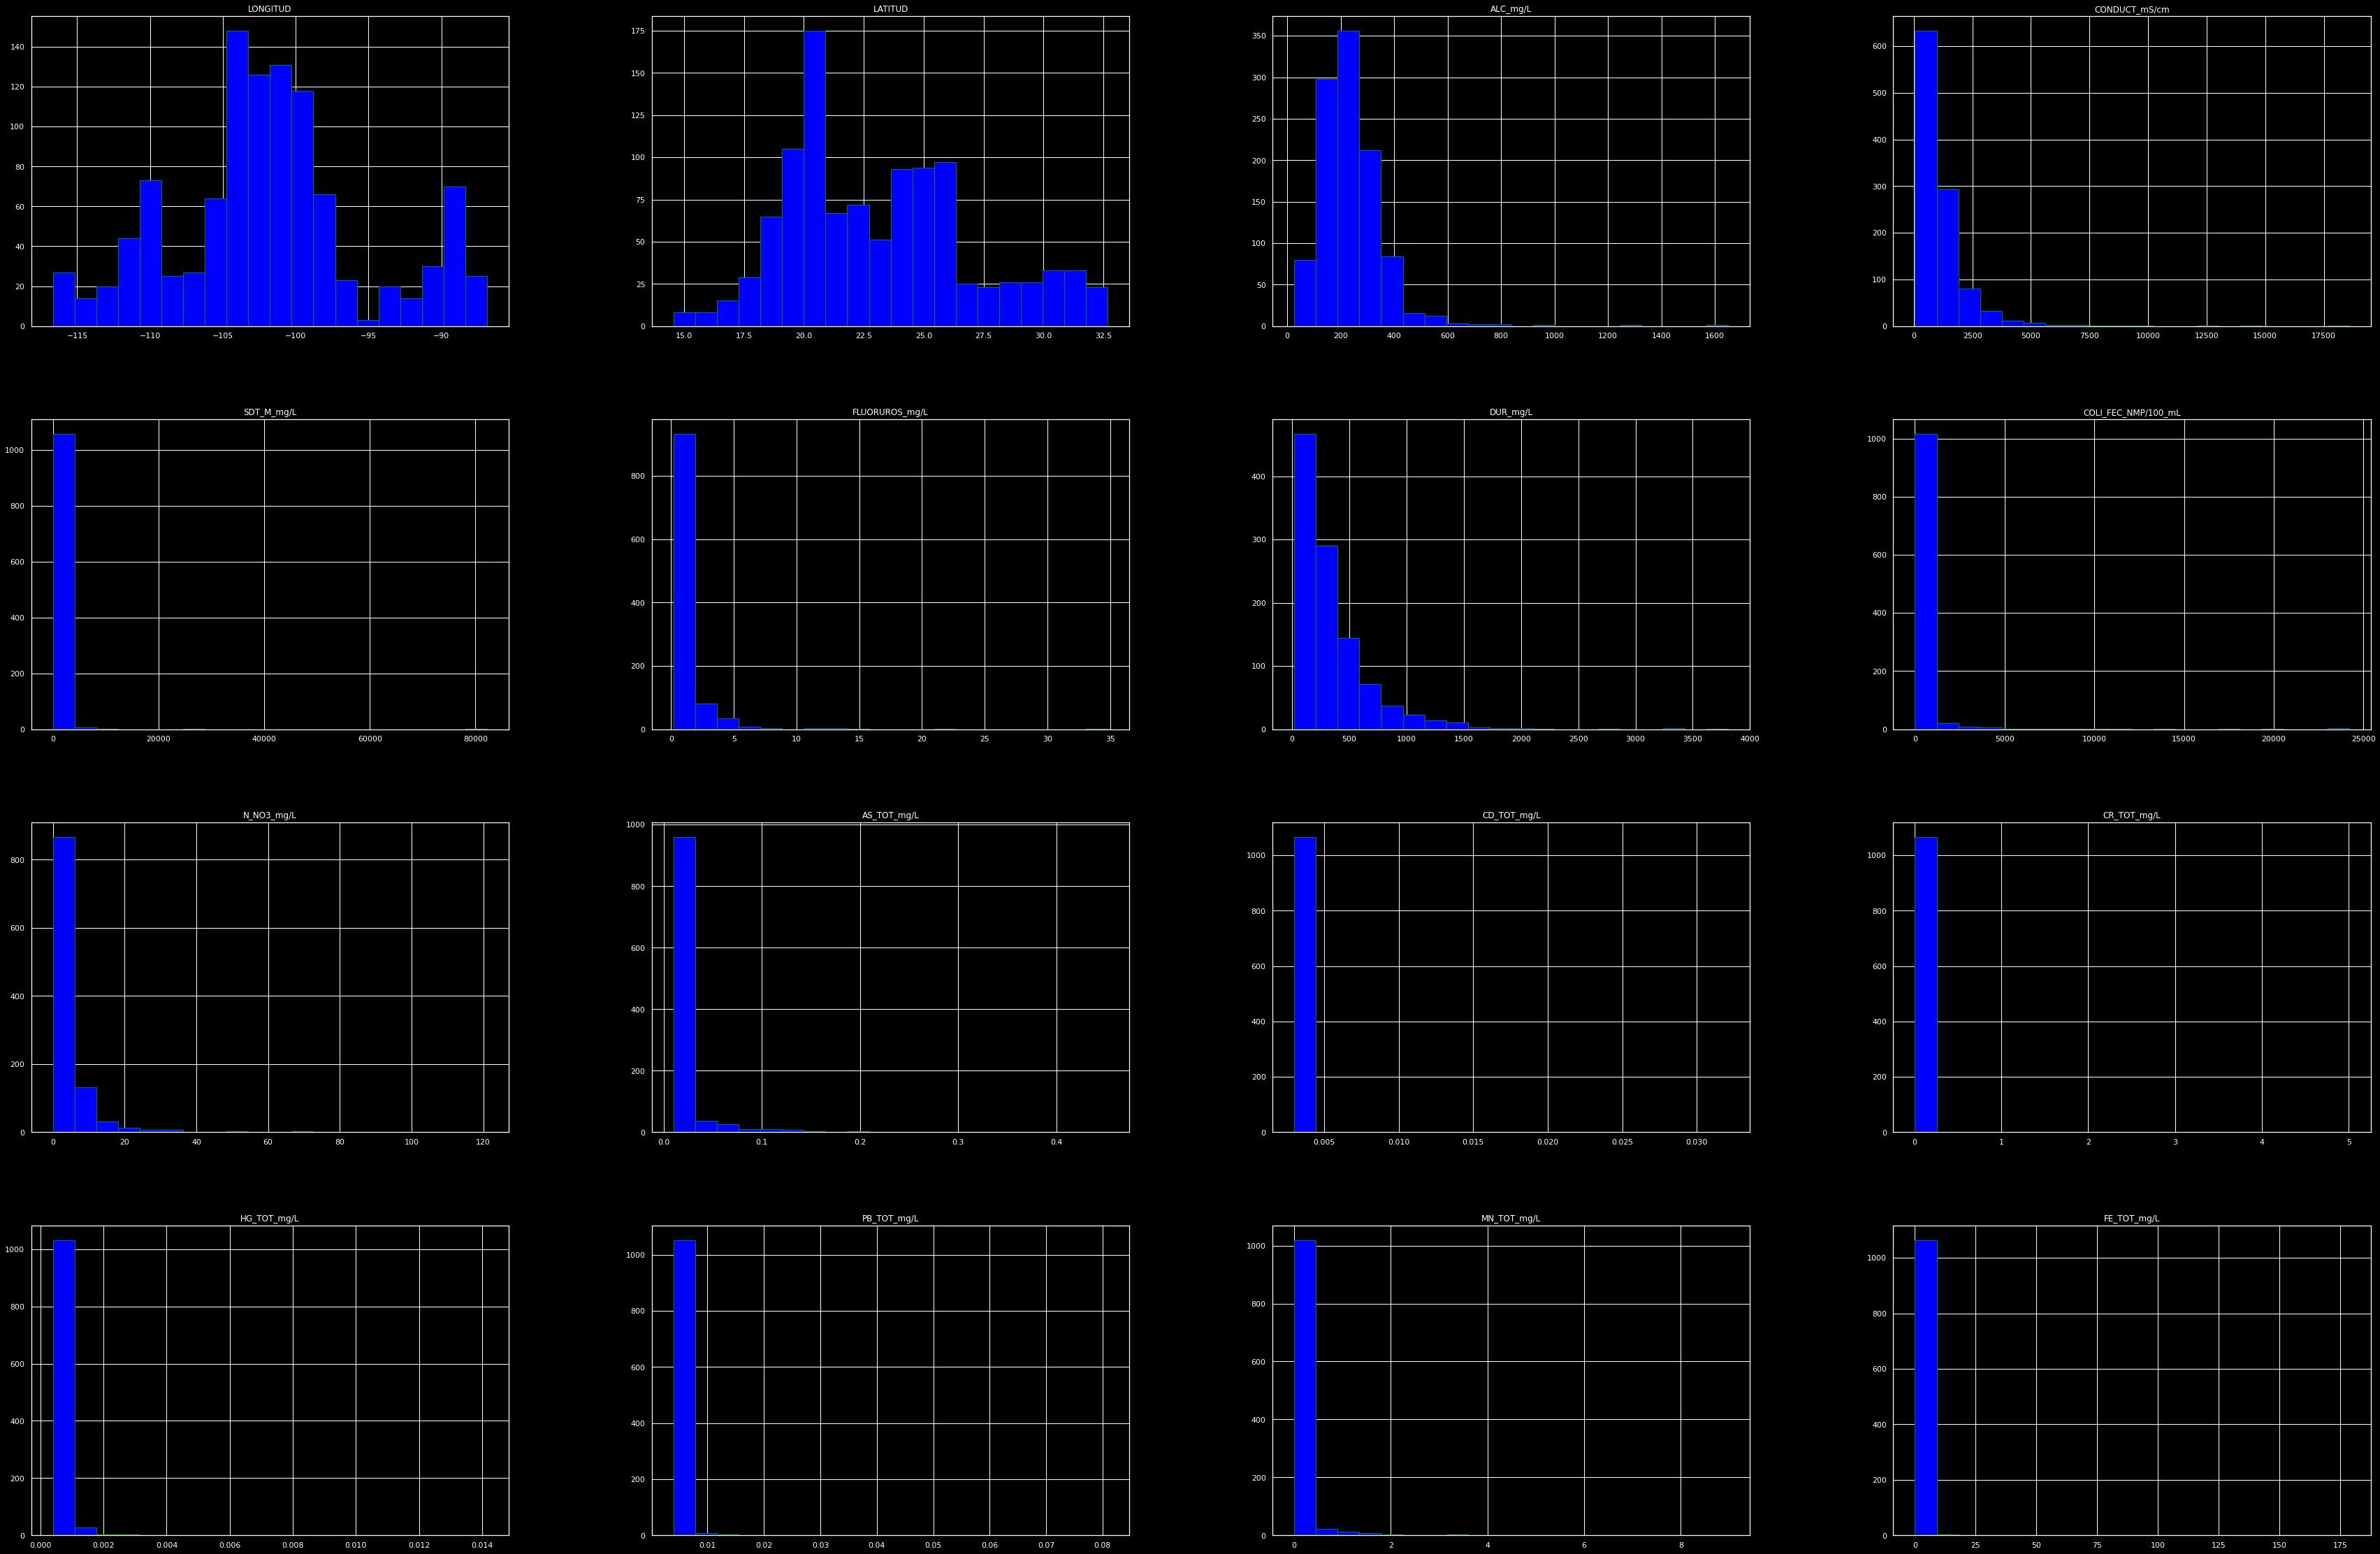

In [31]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
df_sub_clean2.hist(bins=20, figsize=(60,40), color='blue', edgecolor = 'green')
plt.show()

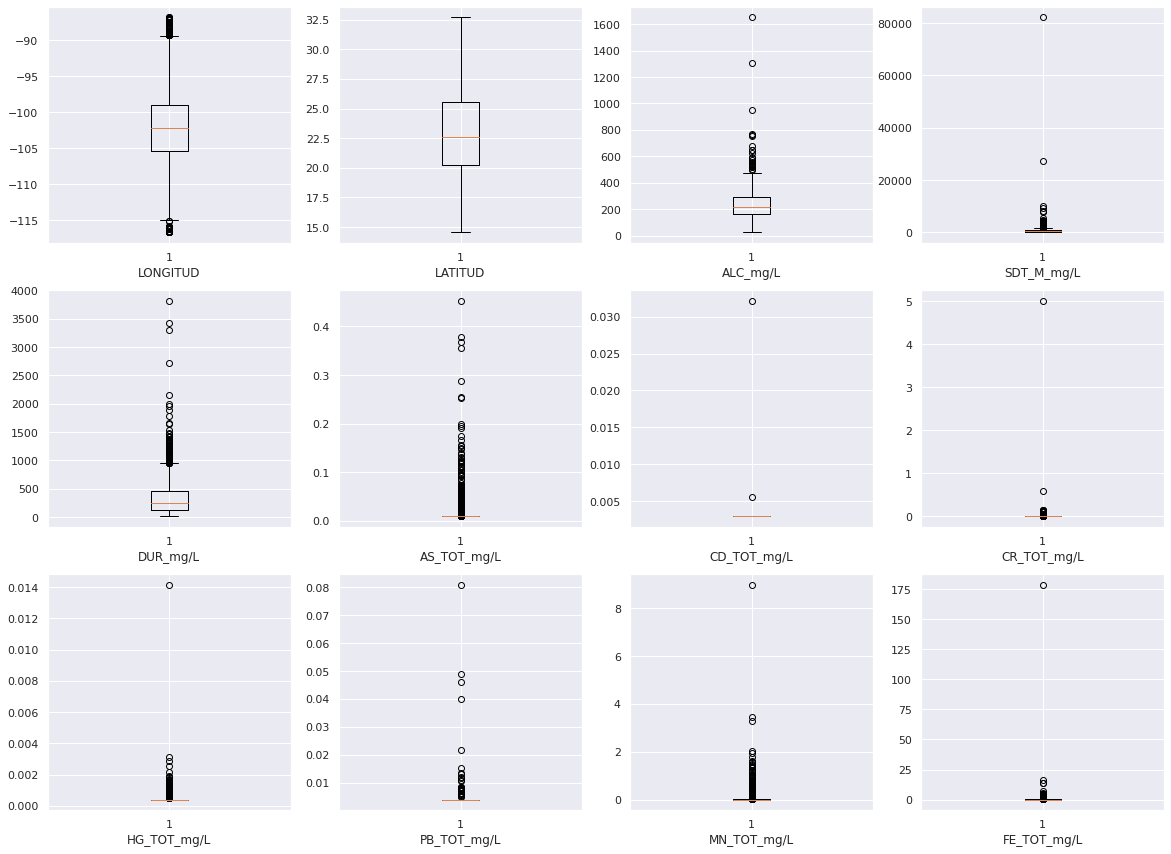

In [32]:
sns.set(rc={'figure.figsize':(20,20)})
fig, axes = plt.subplots(4, 0)
NG = ['LONGITUD','LATITUD']
NC = ['ALC_mg/L','SDT_M_mg/L','DUR_mg/L','AS_TOT_mg/L', 'CD_TOT_mg/L','CR_TOT_mg/L', 'HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

i = 0
for col in df_sub_clean2[NG + NC].columns:
  plt.subplot(4, 4,i+1) 
  plt.boxplot(df_sub_clean2[col]) 
  plt.xlabel(df_sub_clean2[NG + NC].columns[i])
  i = i + 1

In [33]:
df_sub_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1062
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   ALC_mg/L              1068 non-null   float64
 10  CALIDAD_ALC           434 non-null    object 
 11  CONDUCT_mS/cm         1068 non-null   float64
 12  CALIDAD_CONDUC        434 non-null    object 
 13  SDT_M_mg/L            1068 non-null   float64
 14  CALIDAD_SDT_salin     434 non-null    object 
 15  FLUORUROS_mg/L       

In [34]:
df_sub_clean2.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,235.583766,1138.458879,896.822963,1.075600,347.813313,355.490356,4.318205,0.019618,0.003030,0.012476,0.000467,0.004310,0.072478,0.410387
std,6.703263,3.887670,116.664494,1242.459195,2749.051551,1.924278,359.523990,2052.457014,8.341377,0.035209,0.000894,0.154435,0.000479,0.003342,0.376512,5.537974
min,-116.664250,14.561150,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.025000
25%,-105.388865,20.212055,164.048750,505.500000,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.025000
50%,-102.174180,22.617190,215.527500,815.000000,551.400000,0.503500,245.175900,1.100000,2.082916,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.046960
75%,-98.974716,25.510285,292.423750,1322.250000,917.000000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.004000,0.000400,0.004000,0.009947,0.173380
max,-86.864120,32.677713,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


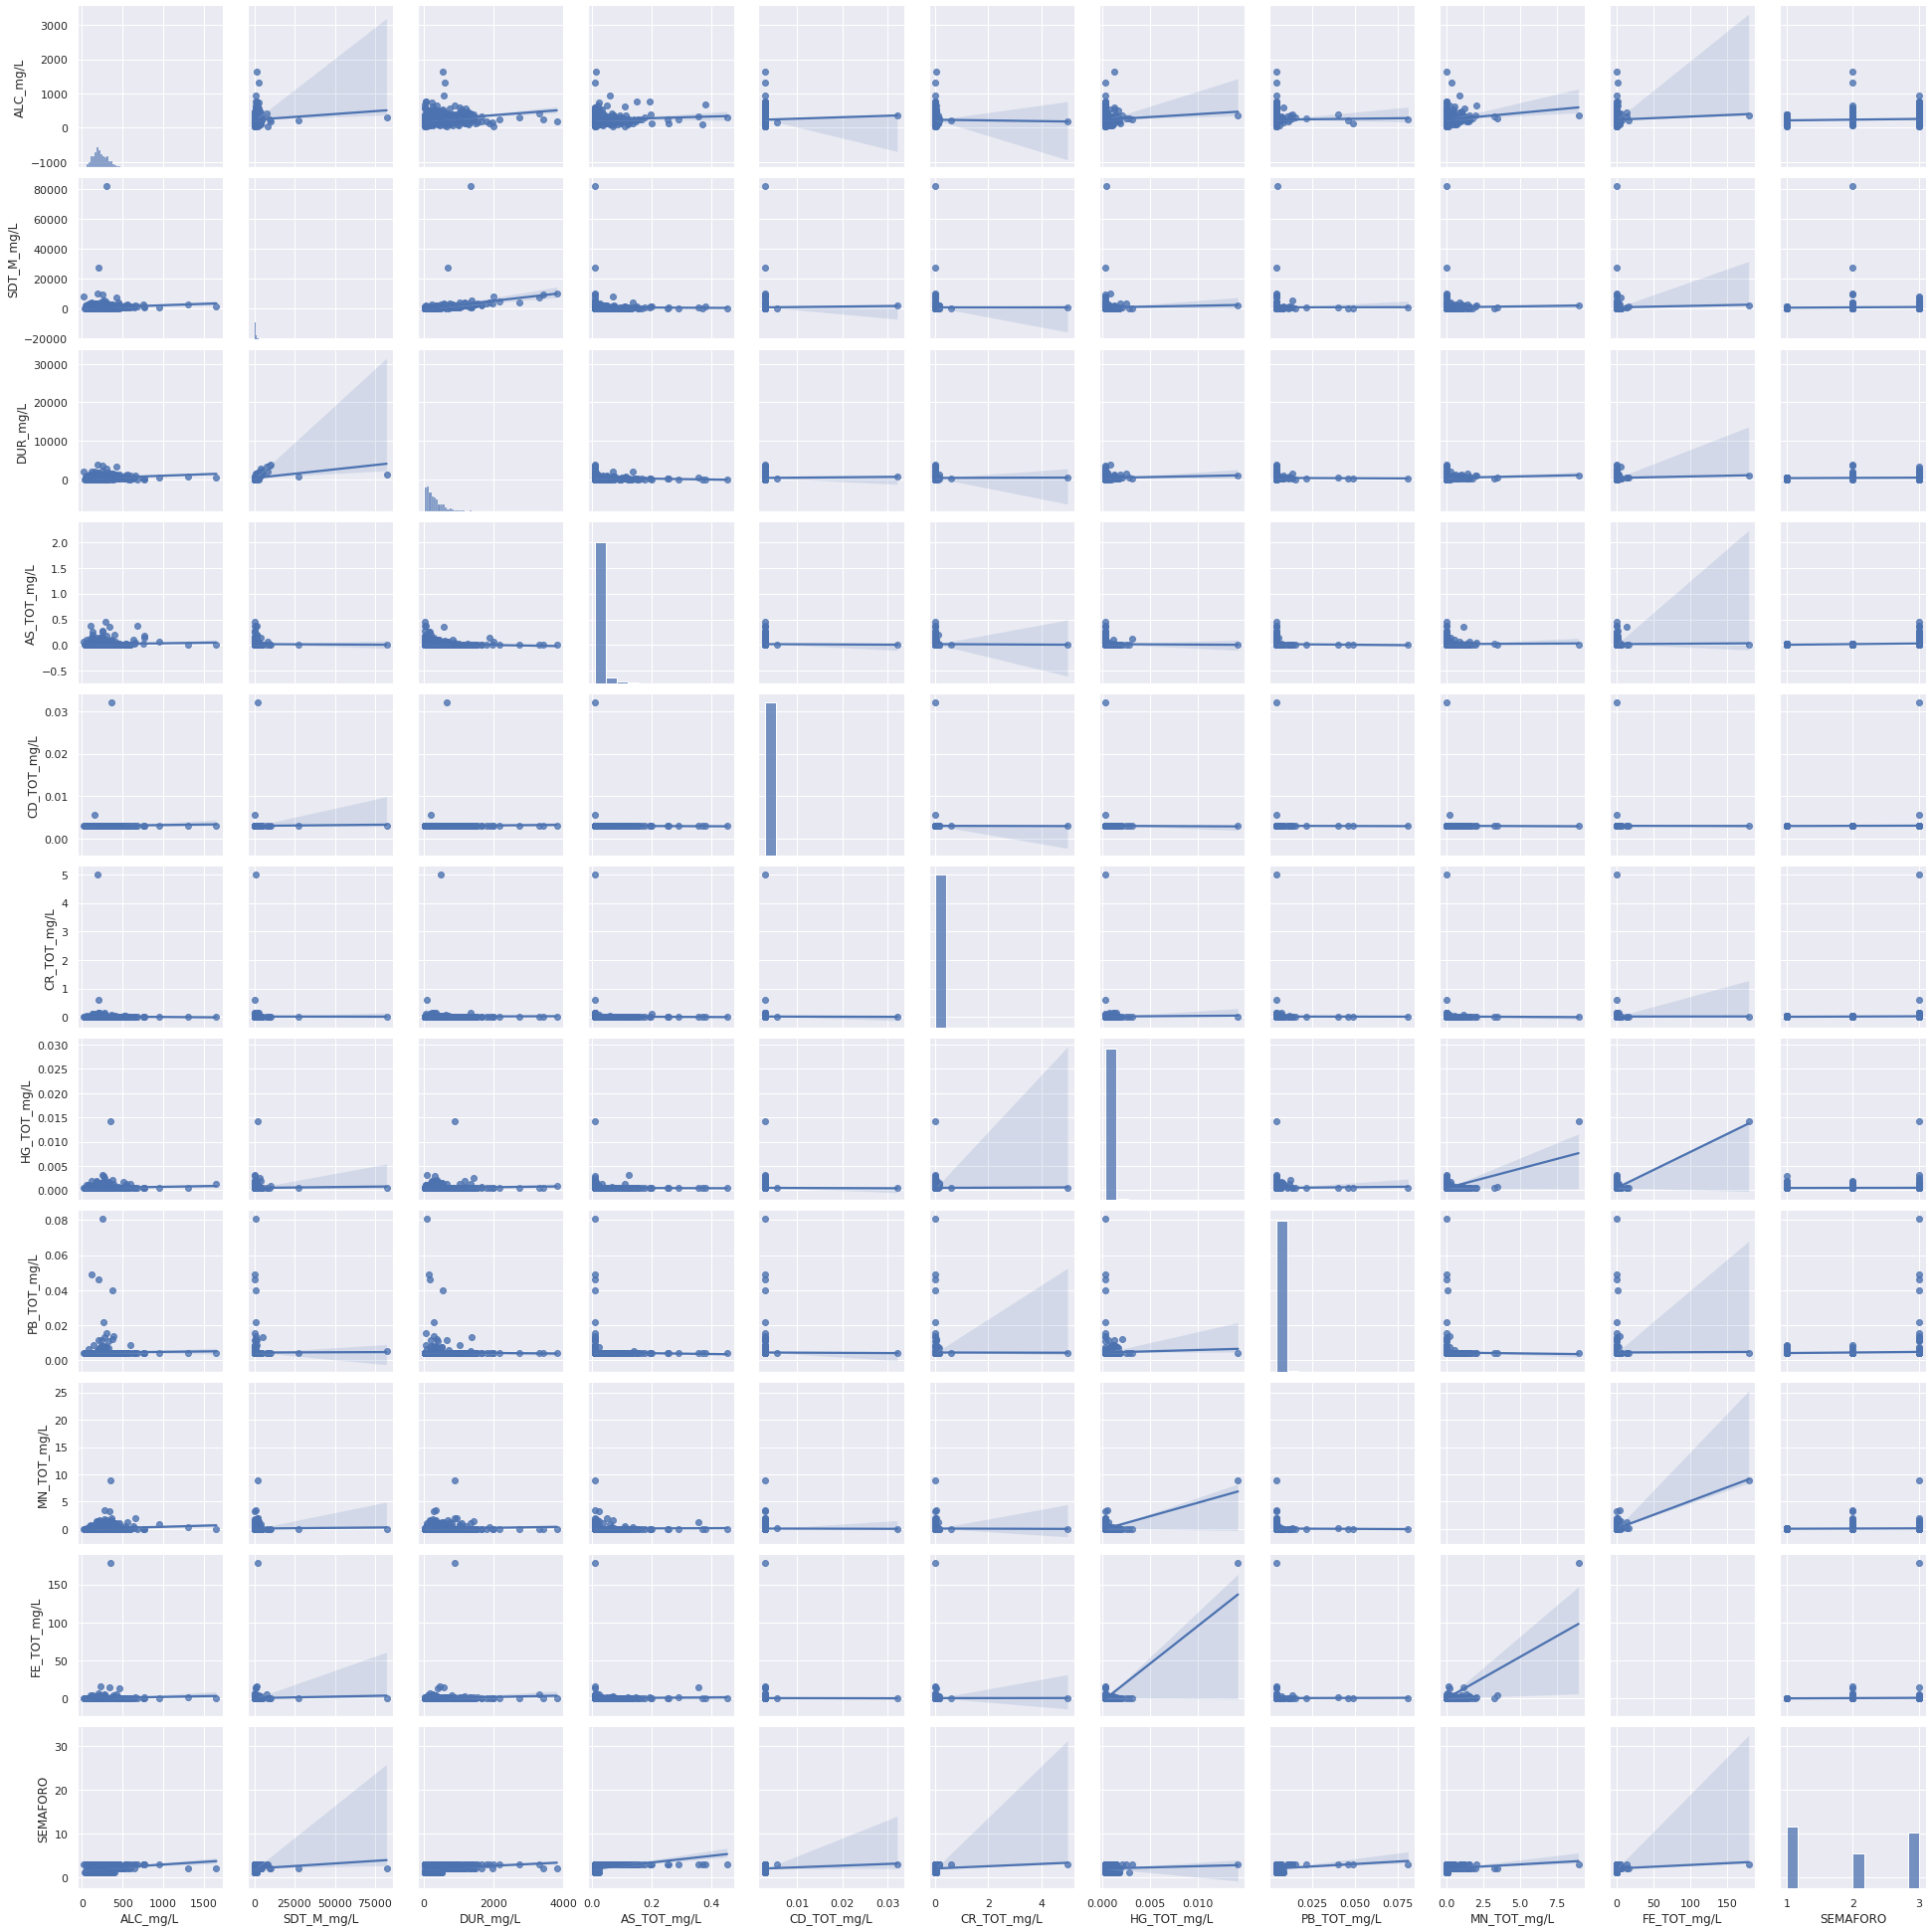

In [41]:
NC = ['ALC_mg/L','SDT_M_mg/L','DUR_mg/L','AS_TOT_mg/L', 'CD_TOT_mg/L','CR_TOT_mg/L', 'HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L','SEMAFORO']

df_sub_clean['SEMAFORO'].replace({'Verde':1,'Amarillo':2,'Rojo':3},inplace=True)
sns.pairplot(df_sub_clean[NC],kind='reg')

### Análisis K-Means

Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

Se realizará el análisis por KMEANS. 


In [50]:
#Importan las librerías a ocupar.
import geopandas
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
from shapely.geometry import Point
import seaborn as sns
from collections import Counter
from sklearn.cluster import KMeans

Se debe de ver gráficamente los datos, para tener una idea de la dispesión de los mismos, se usa la clase en el semáforo. 

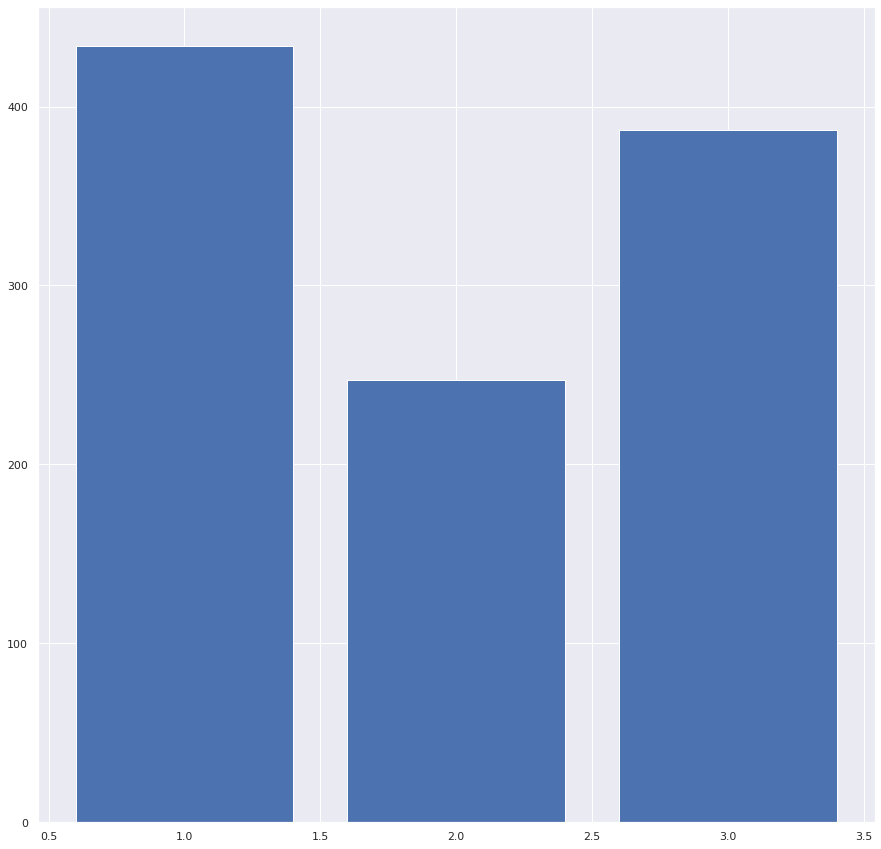

In [49]:
sns.set(rc={'figure.figsize':(15,15)})
y = df_sub_clean['SEMAFORO']
c = Counter(y)
plt.bar(c.keys(), c.values())
plt.show()

Se observa el porcentaje de filas que están etiquetadas con 'SEMAFORO' verde, amarillo y rojo. Se alcanza a observar que la etiqueta verde es la que ocupa la mayoría de las filas en el Data Frame. Se construye el data frame con base a la longitud y latitud, para ver la relación entre las coordinadas y la calidad del agua.  

In [47]:
df_sub_lonlat = df_sub_clean2.copy()

df_sub_lonlat["Coordinates"] = list(zip(df_sub_lonlat.LONGITUD, df_sub_lonlat.LATITUD))
df_sub_lonlat["Coordinates"] = df_sub_lonlat["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df_sub_lonlat, geometry="Coordinates")

El siguiente paso es elegir el número de clusters. Se construye la gráfica de Codo, hallando el valor de K, donde se hace la flexión de la gráfica, ahí es donde se encontrará el valor óptimo para K. Con éllo encontrar el mínomo de clusters para el modelo.

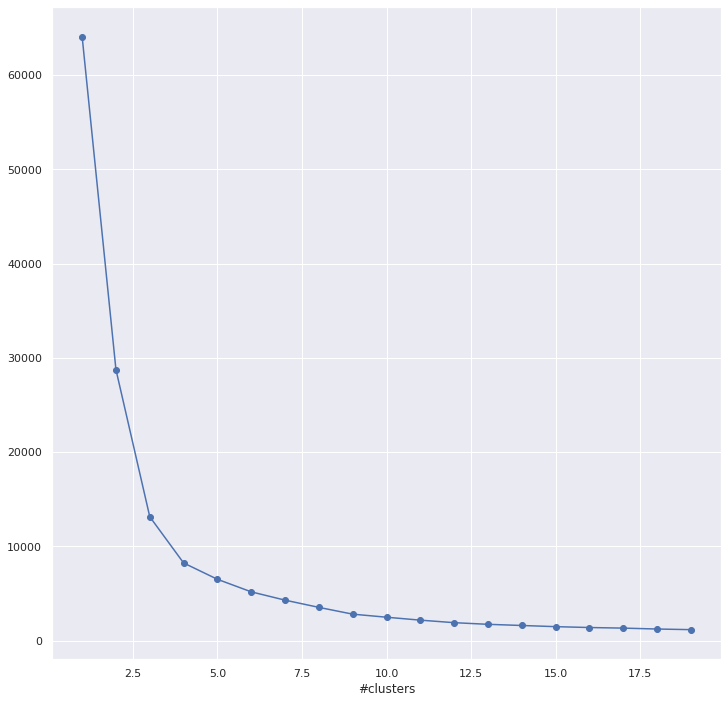

In [59]:
long_lat_sub = list(zip(gdf.LONGITUD, gdf.LATITUD))
m = 20
i = list()

for j in range(1, m):
  kmeans = KMeans(n_clusters=j)
  kmeans.fit(long_lat_sub)
  i.append([j,kmeans.inertia_])

#Se grafica Elbow curve
sns.set(rc={'figure.figsize':(12,12)})
plt.plot(pd.DataFrame(i)[0], pd.DataFrame(i)[1],'-o')
plt.xlabel('#clusters')
plt.show()

Se observa que cinco es la cantidad de clusters mínima. Se ejecuta el algoritmo para 5 clusters y se obtiene la etiqueta y los centrodis. 

In [63]:
#Con KMeans se encontrará las agrupaciones (latitud y longitud o coordenadas), de acuerdo a la calidad del agua
kmeans = KMeans(n_clusters=5).fit(long_lat_sub)
c_kmeans = kmeans.predict(long_lat_sub)
centroids = kmeans.cluster_centers_
print(centroids)

[[-112.58798516   30.31649148]
 [-102.57873342   24.20554738]
 [ -90.09271578   19.6502625 ]
 [-107.79199926   25.85352689]
 [-100.12647372   19.82511781]]


Con KMeans se intentará demostrar que existe relación entre la calidad de agua y coordenadas. Lo que se imprimirá será los porcentajes de cada clase por cada cluster. 

In [87]:
for c in range(0,len(np.bincount(c_kmeans))):
  inx = list()
  inx = [i for i, x in enumerate(c_kmeans) if x == c]
  q = Counter(df_sub_lonlat['SEMAFORO'][inx])
  print('#cluster ' + str(c + 1))  
  for i,j in q.items():
    p = j / len(inx) * 100
    print('%d' %p)
  print("-------------------")

'''Se observa es que por cada cluster, hay 3 clases. Donde el porcentaje mayor es 44%,
   lo que nos dice que no existe una relación entre el 'SEMAFORO' y las coordenadas (lo que se
   traduce entre la calidad del agua y la ubicación). Algo que se podrá confirmar en el mapa
   de Mx. 
'''

#cluster 1
44
26
29
-------------------
#cluster 2
43
41
14
-------------------
#cluster 3
44
24
30
-------------------
#cluster 4
41
29
28
-------------------
#cluster 5
44
33
22
-------------------


"Se observa es que por cada cluster, hay 3 clases. Donde el porcentaje mayor es 44%,\n   lo que nos dice que no existe una relación entre el 'SEMAFORO' y las coordenadas (lo que se\n   traduce entre la calidad del agua y la ubicación). Algo que se podrá confirmar en el mapa\n   de Mx. \n"

Mostramos los resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

Se corrobora que no existe relación entre la calidad del agua y las coordenandas (longitud y latitud).

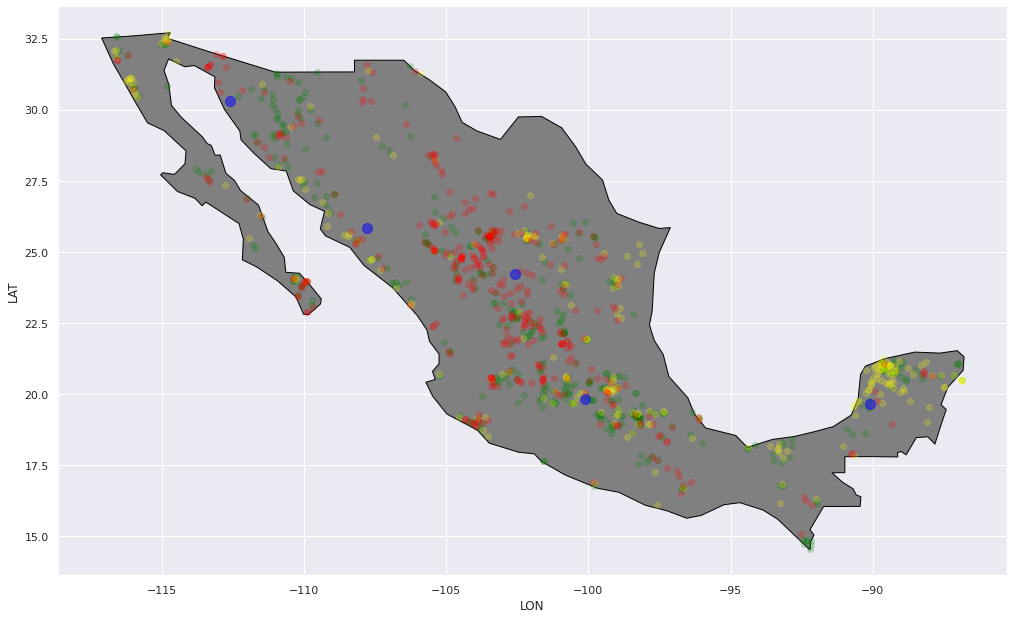

In [93]:
#Se ocupan los clusters de la sección anterior, el total son 5.
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
fig, gax = plt.subplots(figsize=(17,17))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='gray')

#Se grafica el semáforo de la calidad de agua, con el cluster, identificar si hay relación
gdf.loc[gdf['SEMAFORO'] == 1].plot(ax=gax, color='green', alpha = 0.2)
gdf.loc[gdf['SEMAFORO'] == 2].plot(ax=gax, color='yellow', alpha = 0.2)
gdf.loc[gdf['SEMAFORO'] == 3].plot(ax=gax, color='red', alpha = 0.2)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=100, alpha=0.5)

gax.set_xlabel('LON')
gax.set_ylabel('LAT')

plt.show()